In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

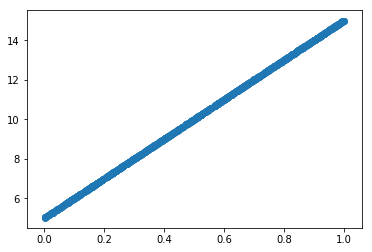

In [11]:
np.random.seed(2018)
x = np.random.rand(1000)
y = 10*x + 5
plt.scatter(x, y)
plt.show()

In [56]:
def fitness(a,b):
    return np.mean((a*x+b-y)**2)

def diversity(a, b, population):
    a_list = [individual['a'] for individual in population ]
    b_list = [individual['b'] for individual in population ]

    a_perc = (a - np.mean(a_list))/np.std(a_list)
    b_perc = (b - np.mean(b_list))/np.std(b_list)
    
    return np.abs(a_perc)+np.abs(b_perc)
#     return 1
    
def mutate(a, b):
#     return a + np.random.rand(), b + np.random.rand()
    return a + np.random.rand()*abs(a/a+b), b + np.random.rand()*abs(b/a+b)

def updatePopulation(population):

    for individual in population:
        individual['fitness'] = fitness(individual['a'], individual['b'])

    fitness_list = [individual['fitness'] for individual in population]

    for individual in population:
        individual['diversity'] = diversity(individual['a'], individual['b'], population)

    diversity_list = [individual['diversity'] for individual in population ]

    for individual in population:
        individual['score'] = individual['diversity'] * np.exp(1/individual['fitness'])

    score_list = [individual['score'] for individual in population ]
    
    return fitness_list, diversity_list, score_list, population

In [70]:
generations = 20
population = []
population_size = 128
fitness_list = []
diversity_list = []
score_list = []

for _ in range(population_size):
    a = np.random.rand()
    b = np.random.rand()

    population.append({'a':a, 'b':b, 'fitness':fitness(a,b)})

fitness_list, diversity_list, score_list, population = updatePopulation(population)

for gen in range(generations):
    
    selection = np.random.choice(population_size, 
                                 population_size, 
                                 p=[individual['score']/sum(score_list) for individual in population])

    crossover = list(np.random.choice(population_size, population_size // 3))
    
    print(min(fitness_list))
    tmp = population.copy()
    population = [tmp[i].copy() for i in selection]
    
    while crossover:
        i = crossover.pop()
        j = crossover.pop()
        
        population[i]['a'], population[i]['b'] = mutate(population[i]['a'], population[i]['b'])
        population[j]['a'], population[j]['b'] = mutate(population[j]['a'], population[j]['b'])
        
        tmp = population[i]['a']
        population[i]['a'] = population[j]['a']
        population[j]['a'] = tmp
        
        tmp = population[i]['b']
        population[i]['b'] = population[j]['b']
        population[j]['b'] = tmp
    
    fitness_list, diversity_list, score_list, population = updatePopulation(population)
    

81.74336155628608
8.383952786417955
1.1464479003663905
1.1464479003663905
0.5925791697447288
0.5925791697447288
0.5925791697447288
0.1725233754838809
0.1725233754838809
0.1725233754838809
0.1725233754838809
0.07071444614924627
0.07071444614924627
0.07071444614924627
0.07071444614924627
0.07071444614924627
0.07071444614924627
0.07071444614924627
0.07071444614924627
0.07071444614924627


In [71]:
for ind in population:
    if ind['fitness'] == min(fitness_list):
        print(ind)

{'a': 10.885234649244072, 'fitness': 0.07071444614924627, 'score': 1266801.756995778, 'diversity': 0.9145015857298722, 'b': 4.619113819555395}
{'a': 10.885234649244072, 'fitness': 0.07071444614924627, 'score': 1266801.756995778, 'diversity': 0.9145015857298722, 'b': 4.619113819555395}
{'a': 10.885234649244072, 'fitness': 0.07071444614924627, 'score': 1266801.756995778, 'diversity': 0.9145015857298722, 'b': 4.619113819555395}
{'a': 10.885234649244072, 'fitness': 0.07071444614924627, 'score': 1266801.756995778, 'diversity': 0.9145015857298722, 'b': 4.619113819555395}
{'a': 10.885234649244072, 'fitness': 0.07071444614924627, 'score': 1266801.756995778, 'diversity': 0.9145015857298722, 'b': 4.619113819555395}
{'a': 10.885234649244072, 'fitness': 0.07071444614924627, 'score': 1266801.756995778, 'diversity': 0.9145015857298722, 'b': 4.619113819555395}
{'a': 10.885234649244072, 'fitness': 0.07071444614924627, 'score': 1266801.756995778, 'diversity': 0.9145015857298722, 'b': 4.619113819555395}